# Assignment 4
MSDS422 - Fulton

## Problem Question:
Compete in the Kaggle.com House Prices: Advanced Regression Techniques competition located here. https://www.kaggle.com/c/house-prices-advanced-regression-techniques (Links to an external site.).

Investigate many variables. Employ at least two regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, stochastic gradient descent, ridge regression, lasso regression, and elastic net. Also employ random forests to the regression problem, following methods described in Géron (2017) Chapter 7. Evaluate these methods within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error. Submit at least two models to Kaggle.com for evaluation.Python scikit-learn should be your primary environment for conducting this research.

Try alternative versions of random forests and gradient boosting. Select a best modeling method .  Employ that method on the full data set, obtaining results that you can report to management.

Regarding the management problem, imagine that you again are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management and why? Reviewing the results of the random forests and gradient boosting model you have selected to present to management, which explanatory variables are most important in predicting home prices?

### Programming Resources

Recall from Assignment 3 that a detailed example showed how to evaluate alternative regressors within a cross-validation design:

Modules / Technical Resources / Regression Examples: Predicting Sales

If you built on that example for Assignment 3, then you should have the structure in place to add random forests as an additional regressor to evaluate. You can keep the work for previous regressors in place. This means that much of the coding work for this assignment will have been completed before you begin the assignment.

Other key programming resources for this assignment include Chapters 6 and 7 of the Géron (2017) textbook and scikit-learn documentation at the link here (Links to an external site.). 

Another useful reference for this assignment is under:

Modules / Technology Resources / Regression Examples: California Housing Study

 
### Programming Notes

Note that one of the key parameters in setting up random forests is the number of explanatory variables to include in the individual trees.  This is given by the max_features meta-parameter. You might try alternative values for this parameter as you fit random forests to the Boston Housing Study data.

With 12 explanatory variables, the range of possible values for max_features is from 1 to 12.  

max_features = 1  forces each tree to split on a single feature ... not ability to detect interaction effects

max_features = 12 means that there will be no randomness in the features being considered for each tree ... could lead to overfitting

Müller and Guido (2017) suggest using max_features = ‘log2’ for random forest regression problems and max_features = ‘sqrt’ for classification problems.

Regarding the other meta-parameters, ensure that bootstrap = True always, and set high values for n_estimators so that estimators are more stable. In my programs for the Boston Housing Study, I have been using n_estimators = 100.

Müller, A. C., & Guido, S. (2017). Introduction to machine learning with Python: A guide for data scientists. Sebastopol, CA: O’Reilly. [ISBN-13: 978-1449369415]. Code examples here

# Analysis and Insights
## Data Prep
I started out with importing the training data and doing some high level checks of the data; looking at a sample of data, checking the data types, and looking at summary statistics. I noticed that several fields have null values and for the most part they are null because the feature doesn't exist so I simply set them to 'none'. 
After that I split the data into training and test sets and seperated the target variable (saleprice). I then built a data pipeline using sklearn. The pipeline identifies the numeric and categorical fields and applies transformations to each of them seperately. 
After transformation I applied four modeling methods; simple linear regression, Ridge regression, Random Forest, and XGBoost.

## Results
I passed all 4 models though a 5 fold cross validation. XGBoost performed the best. I then performed a gridsearch to identify the best parameters for the model. 
On Kaggle the evaluation score came out to be 0.13551 (RMSLE) putting me ahead of 61% of participants. 

## Analysis
Advice for the real estate brokerage firm: Right now I'd recommend the XGBoost model. It performed the best out of the four. While it does not give clear cut reasons for why it predicted the price it did, you can see which features were the most important in producing the prediction. This could be analyzed by a real estate agent to check if it seems in line with what they'd expect.

# Appendix - Code and Output

## Adding Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Data Prep
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
#Modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost
#Validation
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

## Importing Training Data

In [3]:
# Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
df = pd.read_csv('./Data/train.csv', sep=',', engine='python')

## High Level Summary Statistics

In [3]:
# Getting a look at the first 5 rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Based on the info output we see several columns with null values. Looking at the data dictionary then filtering for a few null values we see that many of the nulls signify 'none'. For instance pool quality of NA just means that the house doesn't have a pool. Changing them below from NaN to 'NONE'.

In [3]:
# Filling null values - All of these fields are null because they don't exist. Setting them to 'None'
df.loc[:,'Alley'].fillna('None', inplace = True)
df.loc[:,'FireplaceQu'].fillna('None', inplace = True)
df.loc[df.loc[:,'BsmtCond'].isna(),'BsmtCond']  = 'NONE'
df.loc[df.loc[:,'BsmtExposure'].isna(),'BsmtExposure']  = 'NONE'
df.loc[df.loc[:,'BsmtQual'].isna(),'BsmtQual']  = 'NONE'
df.loc[df.loc[:,'BsmtFinType1'].isna(),'BsmtFinType1']  = 'NONE'
df.loc[df.loc[:,'BsmtFinType2'].isna(),'BsmtFinType2']  = 'NONE'
df.loc[df.loc[:,'GarageType'].isna(),'GarageType']  = 'NONE'
df.loc[df.loc[:,'GarageQual'].isna(),'GarageQual']  = 'NONE'
df.loc[df.loc[:,'GarageFinish'].isna(),'GarageFinish']  = 'NONE'
df.loc[df.loc[:,'GarageCond'].isna(),'GarageCond']  = 'NONE'
df.loc[:,'PoolQC'].fillna('None', inplace = True)
df.loc[:,'Fence'].fillna('None', inplace = True)

# Minimal value so I'm dropping
df.drop(['MiscFeature', 'Id'], axis = 1, inplace = True)

In [6]:
# Getting summary statistics for all object features
with pd.option_context('display.max_columns', 50):
    print(df.describe(include='object'))

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460  1460     1460        1460      1460      1460   
unique        5      2     3        4           4         2         5   
top          RL   Pave  None      Reg         Lvl    AllPub    Inside   
freq       1151   1454  1369      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylS

In [7]:
# Getting summary statistics for all number variables
with pd.option_context('display.max_columns', 50):
    print(df.describe(include='number'))

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

## Further EDA

In [4]:
abs(df.corr()['SalePrice']).sort_values(ascending = False)[1:10]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [60]:
# Grabbing top 10 columns most highly correlated with Sales Price
important_feats = abs(df.corr()['SalePrice']).sort_values(ascending = False)[1:10].index
print(important_feats)

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


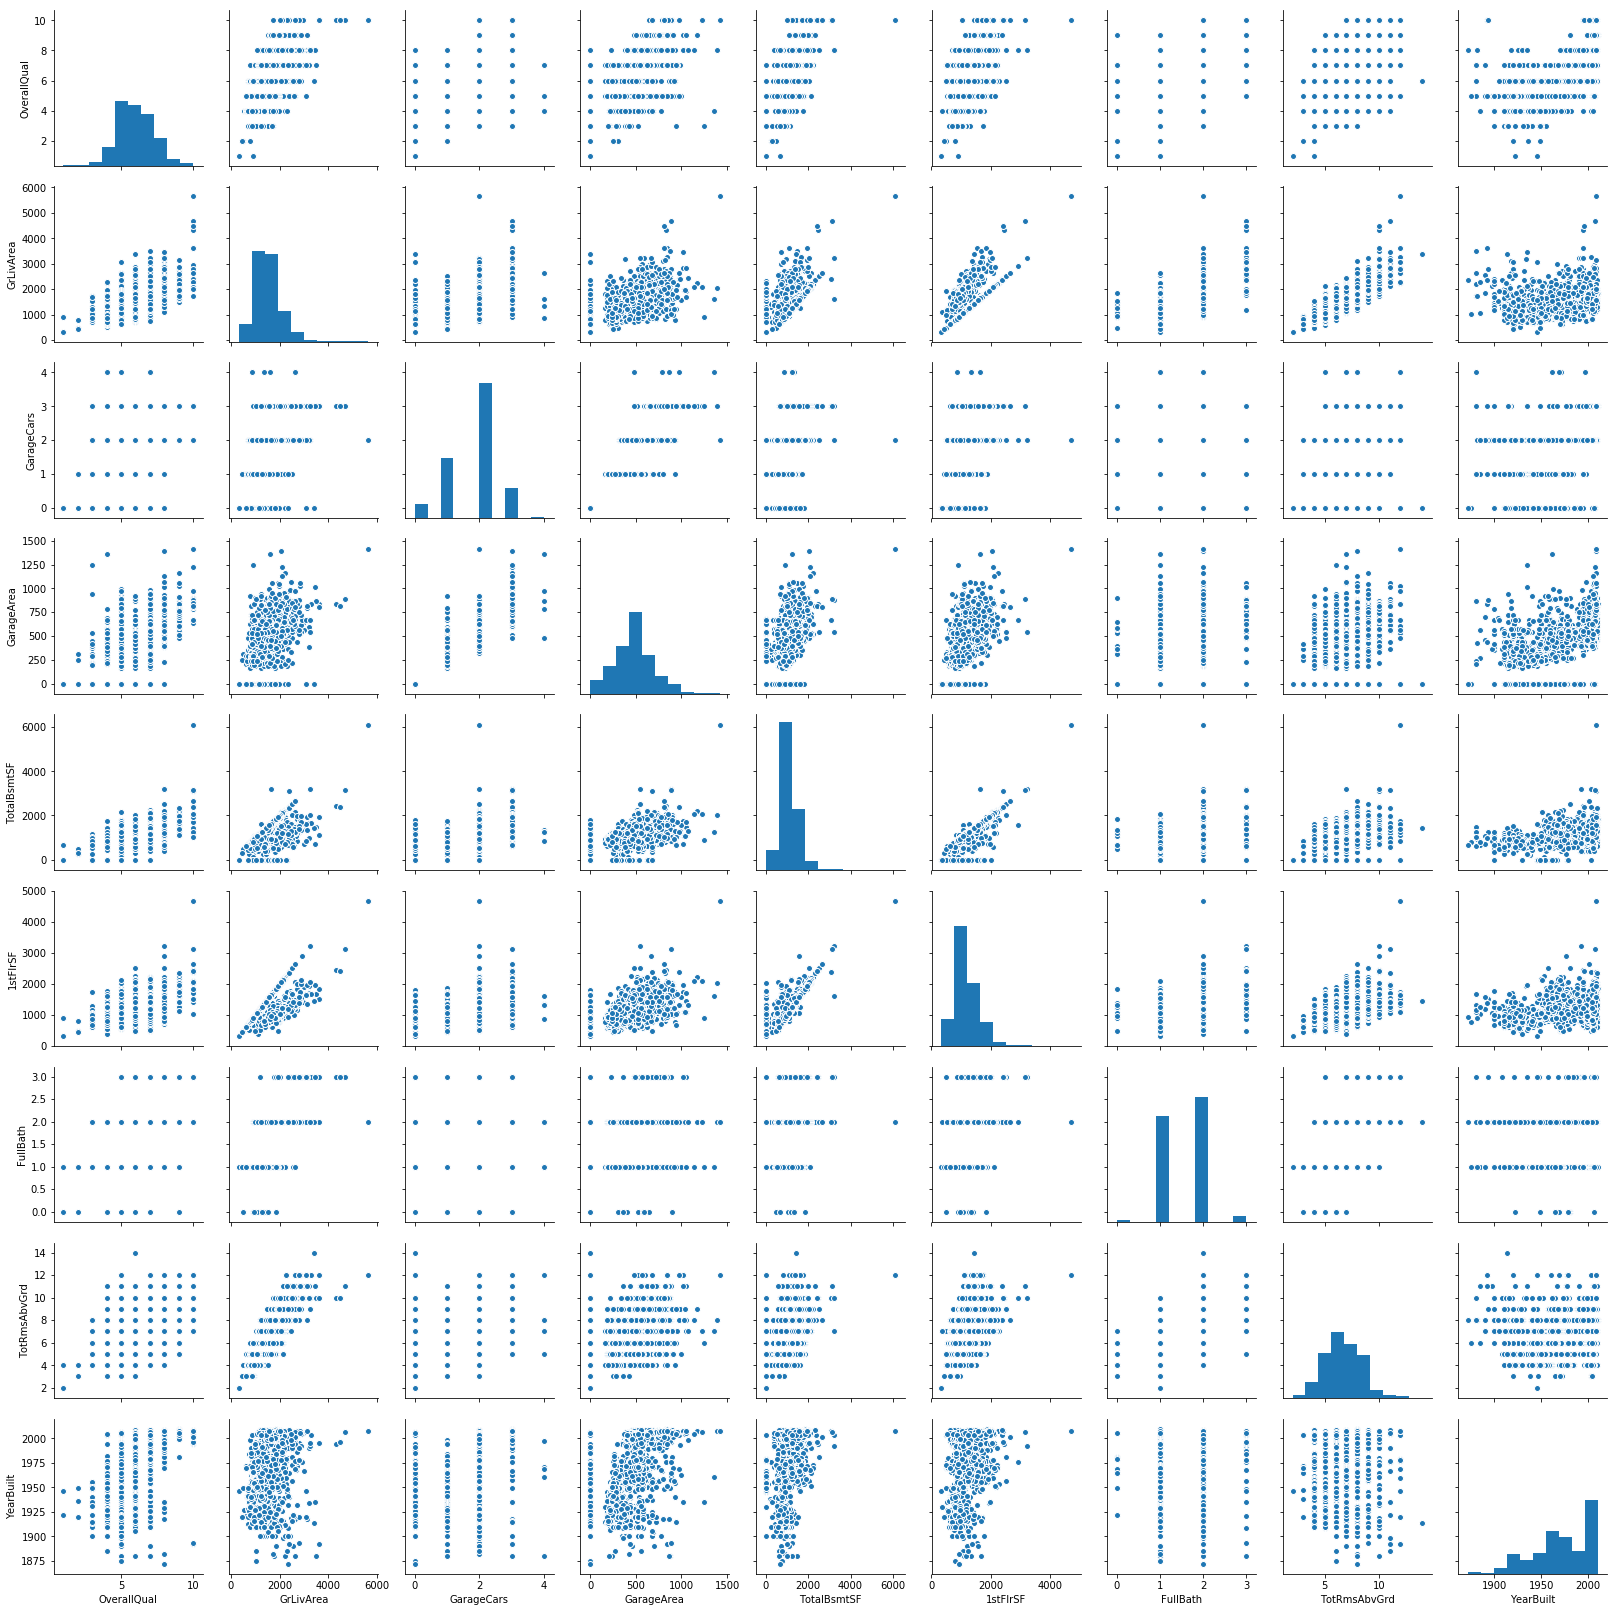

In [62]:
# Checking pairplot of the top features
sns.pairplot(df.loc[:,important_feats])

The problem is a lot of these top features appear to be highly correlated with each other...

## Splitting into Training and Test

In [4]:
# Doing a train test split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'SalePrice', axis = 1), df.loc[:,'SalePrice'], test_size = 0.2, random_state = 1234)

## Feature Creation and Transformation

In [5]:
# Setting up a pipeline as shown in "Hands-On Machine Learning with Scikit-Learn" 
num_attribs = list(X_train.select_dtypes([np.number]))
nom_attribs = list(X_train.select_dtypes([np.object]))
#ord_attribs = []
#pass_attribs = [] #Since these are already prepped we'll just pass them through

# Numeric pipeline: imputing with median and applying standard scaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median"))
    ,('minmax_scaler', MinMaxScaler()) #Scaling not needed for the tree models
])

# Nominal pipeline: applying one hot encoding and imputing with the mode
nom_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "most_frequent")),
    ('1h_encoder', OneHotEncoder(handle_unknown='ignore')) 
])

# Ordinal pipeline: applying ordinal encoding and imputing with the mode
ord_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "most_frequent")),
    ('1h_encoder', OrdinalEncoder()) 
])

# Full pipeline containing the numeric and categorical pipelines
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("nom", nom_pipeline, nom_attribs)
   # ("ord", ord_pipeline, ord_attribs),
    #("pass", "passthrough", pass_attribs)
    ],
    remainder ='drop'
)

# Fitting then transforming the training data
transform_train = full_pipeline.fit_transform(X_train)
# Only Transforming the test data
transform_test = full_pipeline.transform(X_test)

## Modeling
Linear Regression:

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(transform_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Ridge Regression:

In [32]:
ridge_reg = Ridge(alpha = 9)
ridge_reg.fit(transform_train, y_train)

Ridge(alpha=9, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

Random Forest

In [33]:
rfr = RandomForestRegressor(random_state = 1234, max_depth = 50, max_features = 'auto', n_jobs = -1)
rfr.fit(transform_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

XG Boost

In [6]:
xgb_reg = xgboost.XGBRegressor(n_jobs = -1, random_state = 1234, learning_rate = 0.1, n_estimators = 180 , max_depth = 3)
xgb_reg.fit(transform_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=180, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1234, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

## Scoring

In [35]:
# Creating function to calculate 5 fold cross validation for a model
def cv_score(model):
    scores = cross_val_score(model, transform_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
    rmse = np.sqrt(-scores)
    return(rmse)

In [78]:
score = cv_score(lin_reg)
print("Linear Regression: {:,.0f} ({:,.0f})\n".format(score.mean(), score.std()))
score = cv_score(ridge_reg)
print("Ridge Regression: {:,.0f} ({:,.0f})\n".format(score.mean(), score.std()))
score = cv_score(rfr)
print("Random Forest: {:,.0f} ({:,.0f})\n".format(score.mean(), score.std()))
score = cv_score(xgb_reg)
print("XG Boost: {:,.0f} ({:,.0f})\n".format(score.mean(), score.std()))

Linear Regression: 43,082 (13,927)

Ridge Regression: 31,906 (7,195)

Random Forest: 30,715 (6,371)

XG Boost: 29,395 (7,996)



In [86]:
# Checking train/test split prediction
predictions = xgb_reg.predict(transform_train)
rmse = mean_squared_error(y_train, predictions, squared = False)

predictions_test = xgb_reg.predict(transform_test)
rmse_test = mean_squared_error(y_test, predictions_test, squared = False)

print("-------RMSE---------")
print("TRAIN: {:,.0f}".format(rmse))
print("TEST: {:,.0f}".format(rmse_test))

-------RMSE---------
TRAIN: 11,402
TEST: 24,232


It appears that we are overfitting, despite hyperparameter tuning. Why is that happening?

## Grid Search
XGBoost was my best performing model so running a grid search to identify the best parameters

In [37]:
# Values to test:
grid_values = {'max_depth': range (1, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [1, 0.5, 0.1, 0.01, 0.05]}
grid_rfr_acc = GridSearchCV(xgb_reg, param_grid = grid_values, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid_rfr_acc.fit(transform_train, y_train)

In [38]:
# Displaying the best parameters
print(grid_rfr_acc.best_score_)
print(grid_rfr_acc.best_params_)

-842922733.4541774
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 180}


## Submission Steps:

In [113]:
# Reading in test data
submit = pd.read_csv('./Data/test.csv', sep=',', engine='python')

In [114]:
# Filling null values - All of these fields are null because they don't exist. Setting them to 'None'
submit.loc[:,'Alley'].fillna('None', inplace = True)
submit.loc[:,'FireplaceQu'].fillna('None', inplace = True)
submit.loc[df.loc[:,'BsmtCond'].isna(),'BsmtCond']  = 'NONE'
submit.loc[df.loc[:,'BsmtExposure'].isna(),'BsmtExposure']  = 'NONE'
submit.loc[df.loc[:,'BsmtQual'].isna(),'BsmtQual']  = 'NONE'
submit.loc[df.loc[:,'BsmtFinType1'].isna(),'BsmtFinType1']  = 'NONE'
submit.loc[df.loc[:,'BsmtFinType2'].isna(),'BsmtFinType2']  = 'NONE'
submit.loc[df.loc[:,'GarageType'].isna(),'GarageType']  = 'NONE'
submit.loc[df.loc[:,'GarageQual'].isna(),'GarageQual']  = 'NONE'
submit.loc[df.loc[:,'GarageFinish'].isna(),'GarageFinish']  = 'NONE'
submit.loc[df.loc[:,'GarageCond'].isna(),'GarageCond']  = 'NONE'
submit.loc[:,'PoolQC'].fillna('None', inplace = True)
submit.loc[:,'Fence'].fillna('None', inplace = True)

# Minimal values so I'm dropping
submit.drop(['MiscFeature'], axis = 1, inplace = True)

In [115]:
# Applying Transformations
housing_submit = full_pipeline.transform(submit)

In [119]:
# Getting predictions for submission
final_predictions = xgb_reg.predict(housing_submit)

In [120]:
# Packaging submission up
housing_id = np.array(submit['Id']).astype(int)
my_solution = pd.DataFrame(final_predictions, housing_id, columns = ['SalePrice'])
my_solution.to_csv("Submissions/submission_2.csv", index_label = ["Id"])